In [1]:
import numpy as np
import pandas as pd

# 一、认识 pandas 的 series和datefrme

## pd.Series()  --生成series
    Series里可以存放 np.nan 空值（pandas 和 np 其实就是俩兄弟）
    pandas 和 numpy的区别在于：Series元素左边有索引列，ndarray是不显示索引的

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

print(type(s))
print(s)

<class 'pandas.core.series.Series'>
0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


## pd.date_range()  --生成时间序列
    
    '20130101'    指定开始日期
    period=6     说明生成 6期 的时间序列
    dtype='datetime64[ns]'    说明每个元素的类型是 datetime64,存储格式是ns
    freq        指时间频率  'D'是天，还可以是小时、分钟、周、月、年

In [3]:
dates = pd.date_range('20130101', periods=6)
print(type(dates))
print(dates)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


## pd.DataFrame()  --生成dataframe
    DateFram 相当于是多个 Series组成的表
    除了 类似Series的索引，还能指定列的索引

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,A,B,C,D
2013-01-01,0.382576,-2.726750,1.935586,-0.501200
2013-01-02,1.156452,-0.114670,0.316719,-0.547264
2013-01-03,0.032979,0.174433,1.441402,0.000685
2013-01-04,-0.465938,0.217968,-0.047657,0.848474
2013-01-05,0.620594,0.837374,0.287414,-0.480093
2013-01-06,-0.699938,-0.232387,-0.315744,-2.433780


## pd.DataFrame(字典)  --用字典生成dataframe

In [32]:
import numpy as np
import pandas as pd

left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})  # 一个键值对 对应一个 列，键是列名，值是元素
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print(left)
print('-'*100)
print(right)
print('-'*100)

   key  lval
0  foo     1
1  foo     2
----------------------------------------------------------------------------------------------------
   key  rval
0  foo     4
1  foo     5
----------------------------------------------------------------------------------------------------


### 只有 Series 会打印这一列的 dtype , dateFrame 是不会打印dtype 的（即使只有一列）

In [5]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(2, index=list(range(4)), dtype='float32'),
                    'D': np.array([1,2,3,4], dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,2.0,1,test,foo
1,1.0,2013-01-02,2.0,2,train,foo
2,1.0,2013-01-02,2.0,3,test,foo
3,1.0,2013-01-02,2.0,4,train,foo


In [6]:
df3 = pd.DataFrame({'C': pd.Series(2, index=list(range(4)), dtype='float32')})
df3

,C
0,2.0
1,2.0
2,2.0
3,2.0


## 要想查看 dataframe 的数据类型，只有通过 df.dtypes 

In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## df.head(2)  --查看dateframe 前两行

In [9]:
df.head(2)

,A,B,C,D
2013-01-01,0.382576,-2.72675,1.935586,-0.501200
2013-01-02,1.156452,-0.11467,0.316719,-0.547264


## df.tail(3)  --查看dateframe 尾三行

In [10]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.465938,0.217968,-0.047657,0.848474
2013-01-05,0.620594,0.837374,0.287414,-0.480093
2013-01-06,-0.699938,-0.232387,-0.315744,-2.433780


## df.index  --看行索引
## df.columns  --看列索引

In [11]:
print(df)
print(df.index)
print(df.columns)

                   A         B         C         D
2013-01-01  0.382576 -2.726750  1.935586 -0.501200
2013-01-02  1.156452 -0.114670  0.316719 -0.547264
2013-01-03  0.032979  0.174433  1.441402  0.000685
2013-01-04 -0.465938  0.217968 -0.047657  0.848474
2013-01-05  0.620594  0.837374  0.287414 -0.480093
2013-01-06 -0.699938 -0.232387 -0.315744 -2.433780
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')


## dataframe 转为 ndarray

In [12]:
print(df.to_numpy())  # 不会改变df
print(df)

[[ 3.82575528e-01 -2.72675014e+00  1.93558599e+00 -5.01199978e-01]
 [ 1.15645218e+00 -1.14669694e-01  3.16718802e-01 -5.47264038e-01]
 [ 3.29792554e-02  1.74433274e-01  1.44140244e+00  6.84900141e-04]
 [-4.65937503e-01  2.17968429e-01 -4.76572947e-02  8.48473746e-01]
 [ 6.20594337e-01  8.37373850e-01  2.87414216e-01 -4.80093279e-01]
 [-6.99937711e-01 -2.32387068e-01 -3.15744167e-01 -2.43377989e+00]]
                   A         B         C         D
2013-01-01  0.382576 -2.726750  1.935586 -0.501200
2013-01-02  1.156452 -0.114670  0.316719 -0.547264
2013-01-03  0.032979  0.174433  1.441402  0.000685
2013-01-04 -0.465938  0.217968 -0.047657  0.848474
2013-01-05  0.620594  0.837374  0.287414 -0.480093
2013-01-06 -0.699938 -0.232387 -0.315744 -2.433780


In [13]:
print(df2)
print()

t = df2.to_numpy()
print(t)
print(type(t))
type(t[0][4])

     A          B    C  D      E    F
0  1.0 2013-01-02  2.0  1   test  foo
1  1.0 2013-01-02  2.0  2  train  foo
2  1.0 2013-01-02  2.0  3   test  foo
3  1.0 2013-01-02  2.0  4  train  foo

[[1.0 Timestamp('2013-01-02 00:00:00') 2.0 1 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 2.0 2 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 2.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 2.0 4 'train' 'foo']]
<class 'numpy.ndarray'>


str

## describle()  --查看 dataframe 详细信息
    count    这列总共多少数据
    mean    这列数据的平均数
    std     方差
    min     最小值
    25%     四分之一位数
    50%     中位数
    75%     四分之三位数
    max     最大值

In [21]:
print(df)
df.describe()

                   A         B         C         D
2013-01-01  0.382576 -2.726750  1.935586 -0.501200
2013-01-02  1.156452 -0.114670  0.316719 -0.547264
2013-01-03  0.032979  0.174433  1.441402  0.000685
2013-01-04 -0.465938  0.217968 -0.047657  0.848474
2013-01-05  0.620594  0.837374  0.287414 -0.480093
2013-01-06 -0.699938 -0.232387 -0.315744 -2.433780


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.171121,-0.307339,0.602953,-0.518863
std,0.693006,1.242152,0.886307,1.077875
min,-0.699938,-2.726750,-0.315744,-2.433780
25%,-0.341208,-0.202958,0.036111,-0.535748
50%,0.207777,0.029882,0.302067,-0.490647
75%,0.561090,0.207085,1.160232,-0.119510
max,1.156452,0.837374,1.935586,0.848474


# 二、dataframe 的排序

## df.sort_index() --索引排序
    df0.sort_index(axis=0, ascending=False)
    参数说明：
    axis=0         对轴0上的索引排序
    ascending=False   降序排序，升序的话是True

In [24]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)

df0.sort_index(axis=0, ascending=False)

                   A         B         C         D
2013-01-01 -0.068568 -0.845897 -1.123323 -0.920553
2013-01-02 -0.840430 -0.281501  0.628131 -0.258064
2013-01-03  0.726544  2.536275 -0.310472 -0.587319
2013-01-04 -0.315393 -0.050812 -0.471146  0.091158
2013-01-05 -1.031936 -0.237405  0.044191 -1.465401
2013-01-06  1.866167 -0.466395 -0.297271  0.413799


,A,B,C,D
2013-01-06,1.866167,-0.466395,-0.297271,0.413799
2013-01-05,-1.031936,-0.237405,0.044191,-1.465401
2013-01-04,-0.315393,-0.050812,-0.471146,0.091158
2013-01-03,0.726544,2.536275,-0.310472,-0.587319
2013-01-02,-0.840430,-0.281501,0.628131,-0.258064
2013-01-01,-0.068568,-0.845897,-1.123323,-0.920553


## df.sort_values()  --对某一列的数据排序
    df0.sort_values(by='B',ascending=False)
    参数说明：
    by='B'         对名为 B 的那一列的数据进行排序
    ascending=False   降序排序

In [29]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)

df0.sort_values(by='B',ascending=False)

                   A         B         C         D
2013-01-01 -1.732081 -1.262751  0.381345  1.989918
2013-01-02 -0.819140 -0.890431 -0.165468  1.171403
2013-01-03  1.240431  1.132263  0.736245  0.399990
2013-01-04 -0.206100  1.848736 -1.713012  0.809256
2013-01-05  2.730864  2.578779  2.317989 -0.424956
2013-01-06 -0.430736 -1.215777  0.356027 -1.569959


,A,B,C,D
2013-01-05,2.730864,2.578779,2.317989,-0.424956
2013-01-04,-0.206100,1.848736,-1.713012,0.809256
2013-01-03,1.240431,1.132263,0.736245,0.399990
2013-01-02,-0.819140,-0.890431,-0.165468,1.171403
2013-01-06,-0.430736,-1.215777,0.356027,-1.569959
2013-01-01,-1.732081,-1.262751,0.381345,1.989918


# 三、dataframe 切片操作

### df['A']   --取出 dataframe 的某一列（低效操作）
    取出来的实际上是一个 series

In [33]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)
print('-'*100)
print(df0['A'])
print('-'*100)
print(type(df0['A']))

                   A         B         C         D
2013-01-01  0.132531  0.245954 -1.205744 -0.622499
2013-01-02 -2.305284  0.324991 -1.205781 -0.054940
2013-01-03  0.146037  1.110284  0.186335  1.244450
2013-01-04  0.745190  0.317396  2.094291 -0.672719
2013-01-05 -0.183136 -1.313991 -0.516262 -0.391085
2013-01-06 -0.618196  0.608470 -0.284352  0.646859
----------------------------------------------------------------------------------------------------
2013-01-01    0.132531
2013-01-02   -2.305284
2013-01-03    0.146037
2013-01-04    0.745190
2013-01-05   -0.183136
2013-01-06   -0.618196
Freq: D, Name: A, dtype: float64
----------------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>


### df[0:2] 或者 df['2013-01-02':'2013-01-03']    --取多行（低效操作）

In [36]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)
print('-'*100)

print(df0[0:2])
print('-'*100)

print(df0['2013-01-02':'2013-01-03'])

                   A         B         C         D
2013-01-01 -0.071459  0.251407  0.901812 -2.357562
2013-01-02  1.154937  0.081614  1.675654  0.597833
2013-01-03 -0.705763 -2.358556 -0.115746  1.142385
2013-01-04 -1.923827 -0.065123  0.912766  0.716484
2013-01-05  0.147452 -1.864341 -0.653180  2.817402
2013-01-06  1.547890 -0.258848 -0.050319 -1.097665
----------------------------------------------------------------------------------------------------
                   A         B         C         D
2013-01-01 -0.071459  0.251407  0.901812 -2.357562
2013-01-02  1.154937  0.081614  1.675654  0.597833
----------------------------------------------------------------------------------------------------
                   A         B         C         D
2013-01-02  1.154937  0.081614  1.675654  0.597833
2013-01-03 -0.705763 -2.358556 -0.115746  1.142385


## 按名称切片

### df.loc[行名,:]  --取某一行（高效操作）
    官方建议使用接口  df.loc[行名] 和 df.iloc[行索引] 来对date=aframe进行切片操作
    这里的 逗号冒号 可以省略，默认在前面的是行名称，所以省略了还是会取行
    行名不加中括号取出来的是个 series
    行名加中括号取出来的是个 dataframe

In [54]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)
print('-'*100)

print(dates[0])
print('-'*100)
print(df0.loc[dates[0],:])  # 行名不加中括号取出来的是个 series
print('-'*100)
print(type(df0.loc[dates[0]]))  
print('-'*100)

print(df0.loc[[dates[0]],:])  # 行名加中括号取出来的是个 dataframe
print('-'*100)
print(type(df0.loc[[dates[0]]]))  

                   A         B         C         D
2013-01-01 -0.135709 -1.705960 -0.845981  1.039374
2013-01-02 -1.143271 -0.650422  0.838769 -2.192423
2013-01-03  0.586206 -0.230677  0.406886 -1.188958
2013-01-04  0.843204  0.012989 -0.035406  1.358295
2013-01-05 -0.846658 -0.262271  0.237258  1.205316
2013-01-06 -0.702773  0.363897 -1.789128 -1.254599
----------------------------------------------------------------------------------------------------
2013-01-01 00:00:00
----------------------------------------------------------------------------------------------------
A   -0.135709
B   -1.705960
C   -0.845981
D    1.039374
Name: 2013-01-01 00:00:00, dtype: float64
----------------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>
----------------------------------------------------------------------------------------------------
                   A        B         C         D
2013-01-01 -0.135709 -1.70596 -0.84

### df.loc[:,'列名']  --取某一列（高效操作）
    这里的 冒号逗号  不能省略，因为默认在冒号前面的是名称，没有找到这个名称的行的话是会报错的
    列名不加中括号取出的是个 series
    列名加上中括号取出的是个 dataframe 

In [56]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)
print('-'*100)
print(df0.loc[:,'A'])
print('-'*100)
print(type(df0.loc[:,'A']))   # 列名不加中括号取出的是个 series
print('-'*100)
print(df0.loc[:,['A']])
print('-'*100)
print(type(df0.loc[:,['A']]))  # 列名加上中括号取出的是个 dataframe 

                   A         B         C         D
2013-01-01  0.630961  0.630080 -1.158012  0.034270
2013-01-02 -0.230328 -1.224489 -1.626234 -1.938048
2013-01-03  0.737457 -0.261870 -0.509139  2.069199
2013-01-04  0.427990 -0.296708  1.142743 -1.993428
2013-01-05  1.272231  0.203746  0.744320 -0.489820
2013-01-06  0.392122 -0.701959  0.557734  0.329911
----------------------------------------------------------------------------------------------------
2013-01-01    0.630961
2013-01-02   -0.230328
2013-01-03    0.737457
2013-01-04    0.427990
2013-01-05    1.272231
2013-01-06    0.392122
Freq: D, Name: A, dtype: float64
----------------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>
----------------------------------------------------------------------------------------------------
                   A
2013-01-01  0.630961
2013-01-02 -0.230328
2013-01-03  0.737457
2013-01-04  0.427990
2013-01-05  1.272231
2013-01

### df.loc[[行名1,行名2],:]  --取多行（高效操作）
    取出来的是个 dataframe  (加了方括号不管你取的是一行还是多行那都是个 dataframe )

In [60]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)

print('-'*100)
print(df0.loc[[dates[0],dates[1]]])
print('-'*100)
print(type(df0.loc[[dates[0],dates[1]]]))

                   A         B         C         D
2013-01-01  1.470184  0.365595  0.945021  2.002743
2013-01-02  0.989696  0.033811  1.785406  0.659314
2013-01-03  0.102103 -0.277981  2.536610 -0.800135
2013-01-04  0.039519 -0.315392  0.316263 -1.498351
2013-01-05  0.646819  1.048602 -2.153903  0.074779
2013-01-06  0.280738  0.261861 -0.748035  0.302171
----------------------------------------------------------------------------------------------------
                   A         B         C         D
2013-01-01  1.470184  0.365595  0.945021  2.002743
2013-01-02  0.989696  0.033811  1.785406  0.659314
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>


### df.loc[:,[列名1,列名2]]  --取多列（高效操作）
    取出来的是个 dataframe  (加了方括号不管你取的是一列还是多列那都是个 dataframe )

In [62]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)

print('-'*100)
print(df0.loc[:,['A','B']])
print('-'*100)
print(type(df0.loc[:,['A','B']]))

                   A         B         C         D
2013-01-01  1.814086 -1.780685 -2.496959 -0.271276
2013-01-02 -0.676508  0.727801 -0.801550  1.363852
2013-01-03  0.798837 -0.252750 -0.278951 -0.387261
2013-01-04  0.389123  0.239706 -0.510377 -0.350032
2013-01-05  1.580759  0.306273 -0.411083 -1.383349
2013-01-06 -0.022612  0.291651 -0.294576  0.413380
----------------------------------------------------------------------------------------------------
                   A         B
2013-01-01  1.814086 -1.780685
2013-01-02 -0.676508  0.727801
2013-01-03  0.798837 -0.252750
2013-01-04  0.389123  0.239706
2013-01-05  1.580759  0.306273
2013-01-06 -0.022612  0.291651
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>


### df.loc[[行名1,行名2],[列名1,列名2]]  --交叉取多行多列（高效操作）
    取出的是个 dataframe

In [64]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)

print('-'*100)
print(df0.loc[[dates[0],dates[1]],['A','B']])
print('-'*100)
print(type(df0.loc[[dates[0],dates[1]],['A','B']]))

                   A         B         C         D
2013-01-01 -0.214544  0.558106 -0.854066 -0.688343
2013-01-02 -0.484591 -0.439894  1.374978  0.495634
2013-01-03 -0.378599  0.539846  1.010986  0.749799
2013-01-04 -0.940003 -0.076025 -1.833362  0.305799
2013-01-05  0.832492  1.997536  0.252158  0.144199
2013-01-06 -1.415790  0.284447 -0.598799 -0.780740
----------------------------------------------------------------------------------------------------
                   A         B
2013-01-01 -0.214544  0.558106
2013-01-02 -0.484591 -0.439894
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>


## 按索引号切片

## df.iloc[[1,2,3],[1,2]]  --按索引号取多行多列
    iloc[]  所有规则 同loc[] 
    只不过是把行或列的名称换成了索引号
    索引号为负数表示倒数的行或列
    
    df0.iloc[1:4 , [1,2]]
    多行多列，不加中括号可以取连续多行或多列，加中括号取的是离散的行或列，取出的是个dataframe

In [74]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)

print('-'*100)
print(df0.iloc[:,1])  # 不加中括号取出来的依旧是series
print('-'*100)
print(type(df0.iloc[:,1]))

print('-'*100)
print(df0.iloc[1:4,[1,2]])  # 多行多列，不加中括号可以取连续多行或多列，加中括号取得是离散的行或列，取出的是个dataframe
print('-'*100)
print(type(df0.iloc[1:4,[1,2]])) 

                   A         B         C         D
2013-01-01 -1.168926  0.930677  1.300412  0.373864
2013-01-02 -0.906023 -0.565036 -0.943075  0.414007
2013-01-03  0.400813  0.771535  1.785444 -1.277090
2013-01-04 -0.352850  0.338074  0.174199  1.557099
2013-01-05  0.493707 -0.079013  0.087655  0.719996
2013-01-06  2.959484 -0.153127  0.631416  0.118081
----------------------------------------------------------------------------------------------------
2013-01-01    0.930677
2013-01-02   -0.565036
2013-01-03    0.771535
2013-01-04    0.338074
2013-01-05   -0.079013
2013-01-06   -0.153127
Freq: D, Name: B, dtype: float64
----------------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>
----------------------------------------------------------------------------------------------------
                   B         C
2013-01-02 -0.565036 -0.943075
2013-01-03  0.771535  1.785444
2013-01-04  0.338074  0.174199
---------

# 四、dataframe查询（逻辑表达式切片） 

In [85]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)
print('-'*100)

print(df0[df0.A > 0])  # A列 大于0 的所有行
print('-'*100)

df1=df0[df0>0]  # 将所有小于 0 的元素变成 nan
print(df1)
print('-'*100)

print(np.isnan(df1.iloc[0,0]))  # 通过  iloc[]  取得dataframe 中某一位置的元素

                   A         B         C         D
2013-01-01 -1.752013 -0.525353 -0.286629  0.329884
2013-01-02  0.078081 -0.192581  0.047636 -0.153477
2013-01-03  0.635206 -0.897908 -0.038486  0.212138
2013-01-04 -0.596290 -2.032663 -0.083706  0.821557
2013-01-05  0.505822  0.306071  0.324495  0.945084
2013-01-06  0.142119 -1.921251 -0.167442 -0.248869
----------------------------------------------------------------------------------------------------
                   A         B         C         D
2013-01-02  0.078081 -0.192581  0.047636 -0.153477
2013-01-03  0.635206 -0.897908 -0.038486  0.212138
2013-01-05  0.505822  0.306071  0.324495  0.945084
2013-01-06  0.142119 -1.921251 -0.167442 -0.248869
----------------------------------------------------------------------------------------------------
                   A         B         C         D
2013-01-01       NaN       NaN       NaN  0.329884
2013-01-02  0.078081       NaN  0.047636       NaN
2013-01-03  0.635206       NaN   

## df.[df[列名].isin([列名1,,列名2])] --查询某一列中值是 列名1或列名2的所有行

In [88]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)
print('-'*100)

df2 = df0.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']  # 新增 E 列
print(df2)
print('-'*100)

print(df2[df2['E'].isin(['two', 'four'])])  # 查询 E 列中值为 two 或 four 的所有行

                   A         B         C         D
2013-01-01 -0.290794 -1.100053  0.294160 -1.757129
2013-01-02  0.183543  1.979457 -0.360440  0.588383
2013-01-03  0.360131 -0.110491 -0.819472 -0.956627
2013-01-04  0.107992  0.836623 -0.703046  0.740889
2013-01-05  0.401696  1.272947  0.104667  0.928215
2013-01-06 -2.898942  1.618438 -1.003075 -0.938528
----------------------------------------------------------------------------------------------------
                   A         B         C         D      E
2013-01-01 -0.290794 -1.100053  0.294160 -1.757129    one
2013-01-02  0.183543  1.979457 -0.360440  0.588383    one
2013-01-03  0.360131 -0.110491 -0.819472 -0.956627    two
2013-01-04  0.107992  0.836623 -0.703046  0.740889  three
2013-01-05  0.401696  1.272947  0.104667  0.928215   four
2013-01-06 -2.898942  1.618438 -1.003075 -0.938528  three
----------------------------------------------------------------------------------------------------
                   A         B     

# 五、dataframe新增

## df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']  --新增给定列

In [86]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)
print('-'*100)

df2 = df0.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']  # 新增 E 列
print(df2)

                   A         B         C         D
2013-01-01  1.890296  1.026070  0.473312  0.760555
2013-01-02  2.698171 -1.860002  1.672689  1.420873
2013-01-03 -0.237919 -1.929153  2.490269 -2.334112
2013-01-04  2.239951 -1.090828 -0.270877  1.285071
2013-01-05 -0.939698  0.345714  1.211569  0.577510
2013-01-06  0.195827  0.046298  0.627182 -0.212920
----------------------------------------------------------------------------------------------------
                   A         B         C         D      E
2013-01-01  1.890296  1.026070  0.473312  0.760555    one
2013-01-02  2.698171 -1.860002  1.672689  1.420873    one
2013-01-03 -0.237919 -1.929153  2.490269 -2.334112    two
2013-01-04  2.239951 -1.090828 -0.270877  1.285071  three
2013-01-05 -0.939698  0.345714  1.211569  0.577510   four
2013-01-06  0.195827  0.046298  0.627182 -0.212920  three


## df0['F'] = series1 --将已有的 series 作为新增列插入，对不上的位置默认填 nan 或直接剔除
    数据对不上的话，空的位置填nan,多的数据直接剔除
    这个特性可以合并两份excel的数据，算出其中一份数据在另一份数据中的占有率
    比如一家超市，excel1统计了有多少人经过这家超市，excel2统计了有多少人进入了这家超市
    那就可以将excel2 的数据插入到excel1 当中，和excel1 的经过人数对应，没对上的填nan
    nan 就说明这个人经过超市但是没进超市，这就可以根据行数和nan的个数算出这家超市的  进店率

In [92]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)
print('-'*100)

series1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6)) # 因为这里的series是从20130102开始的，有些数据对不上
print(series1)
print('-'*100)

df0['F'] = series1  # 将已有的 series 作为新增列插入，数据对不上的位置默认填 nan 或直接剔除
print(df0)

                   A         B         C         D
2013-01-01 -0.269848 -1.242226  1.023973  1.678479
2013-01-02 -2.078700  0.310801  1.810445  1.470436
2013-01-03 -1.720801 -1.002746  0.802447  1.121272
2013-01-04 -1.504091 -0.308191 -0.861101  0.234215
2013-01-05 -1.861461 -0.398806 -1.271416  1.235647
2013-01-06 -1.057030 -0.772053  0.432516 -1.062355
----------------------------------------------------------------------------------------------------
2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64
----------------------------------------------------------------------------------------------------
                   A         B         C         D    F
2013-01-01 -0.269848 -1.242226  1.023973  1.678479  NaN
2013-01-02 -2.078700  0.310801  1.810445  1.470436  1.0
2013-01-03 -1.720801 -1.002746  0.802447  1.121272  2.0
2013-01-04 -1.504091 -0.308191 -0.861101  0.234215  3.0
2013-01-05 -1.861461 -0.398806 -1.271416  1

# 六、dataframe 修改

## df1[df1<0] = -df1  --将dataframe 中所有小于零的数变成正数(高效批量操作)
    df1[df1<0] = -df1
    nan的地方不会被赋值，而且df1[df1<0] 只是临时改变dataframe元素，但是赋值操作会永久改变元素
    可以理解为：当df1中元素小于0的时候才会进行赋值操作

In [97]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)
print('-'*100)

df1 = df0.copy()
print(df1[df1<0])
print('-'*100)

print(-df1)
print('-'*100)

df1[df1<0] = -df1  # 当df1中元素小于0的时候才会进行赋值操作
print(df1)

                   A         B         C         D
2013-01-01  0.130835  0.001191  0.554576 -0.059661
2013-01-02  0.481272 -0.119066 -1.350301  0.352753
2013-01-03  0.054332 -1.110093 -0.692871 -0.981582
2013-01-04  1.351754  0.639099  1.314911 -0.414209
2013-01-05  0.221277  0.148516 -1.302810 -0.807810
2013-01-06  0.054217 -1.294429  0.288772  0.696034
----------------------------------------------------------------------------------------------------
             A         B         C         D
2013-01-01 NaN       NaN       NaN -0.059661
2013-01-02 NaN -0.119066 -1.350301       NaN
2013-01-03 NaN -1.110093 -0.692871 -0.981582
2013-01-04 NaN       NaN       NaN -0.414209
2013-01-05 NaN       NaN -1.302810 -0.807810
2013-01-06 NaN -1.294429       NaN       NaN
----------------------------------------------------------------------------------------------------
                   A         B         C         D
2013-01-01 -0.130835 -0.001191 -0.554576  0.059661
2013-01-02 -0.481272  0.

## df.reindex()  --修改索引生成新dataframe（删除或新增）
    df.reindex(index=dates[1:4], columns=list(df.columns) + ['E'])
    只取1、2、3三行，并且新增 E 列（没数据就默认全是nan）

In [99]:
import numpy as np
import pandas as pd

dates = pd.date_range('20130101', periods=6)
df0 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df0)
print('-'*100)

df1 = df0.reindex(index=dates[1:4], columns=list(df0.columns) + ['E'])  # 只取1、2、3三行，并且新增 E 列（没数据就默认全是nan）
df1

                   A         B         C         D
2013-01-01  1.029907 -0.335818 -0.166857  0.155829
2013-01-02  0.468502  0.454715 -0.405717  0.664426
2013-01-03  0.228299 -0.282356 -0.326599 -0.462810
2013-01-04  0.432148  0.349740  0.387729  1.394491
2013-01-05  0.088192 -1.439902  0.391486  0.814626
2013-01-06 -0.517801  1.162973  0.003510  0.882494
----------------------------------------------------------------------------------------------------


,A,B,C,D,E
2013-01-02,0.468502,0.454715,-0.405717,0.664426,NaN
2013-01-03,0.228299,-0.282356,-0.326599,-0.462810,NaN
2013-01-04,0.432148,0.349740,0.387729,1.394491,NaN


## 修改指定位置的元素（切片+赋值）

In [101]:
print(df1)
df1.loc[dates[0]:dates[2], 'E'] = 1  # E 列的第0行和第1行赋值为1
df1

                   A         B         C         D    E
2013-01-02  0.468502  0.454715 -0.405717  0.664426  1.0
2013-01-03  0.228299 -0.282356 -0.326599 -0.462810  NaN
2013-01-04  0.432148  0.349740  0.387729  1.394491  NaN


,A,B,C,D,E
2013-01-02,0.468502,0.454715,-0.405717,0.664426,1.0
2013-01-03,0.228299,-0.282356,-0.326599,-0.462810,1.0
2013-01-04,0.432148,0.349740,0.387729,1.394491,NaN


# 七、dataframe 删除及新增

## df.dropna(how='any')  --返回 删除了有空值的行 后的dataframe（不会改变原数组）

In [105]:
print(df1)
print('-'*100)
print(df1.dropna(how='any'))
df1

                   A         B         C         D    E
2013-01-02  0.468502  0.454715 -0.405717  0.664426  1.0
2013-01-03  0.228299 -0.282356 -0.326599 -0.462810  1.0
2013-01-04  0.432148  0.349740  0.387729  1.394491  NaN
----------------------------------------------------------------------------------------------------
                   A         B         C         D    E
2013-01-02  0.468502  0.454715 -0.405717  0.664426  1.0
2013-01-03  0.228299 -0.282356 -0.326599 -0.462810  1.0


,A,B,C,D,E
2013-01-02,0.468502,0.454715,-0.405717,0.664426,1.0
2013-01-03,0.228299,-0.282356,-0.326599,-0.462810,1.0
2013-01-04,0.432148,0.349740,0.387729,1.394491,NaN


## df.fillna(value=5)  --返回 将空值填成5 后的dataframe（不会改变原数组）

In [108]:
df1.iloc[[0],[0]]=np.nan
print(df1)
print('-'*100)
print(df1.fillna(value=5))
df1

                   A         B         C         D    E
2013-01-02       NaN  0.454715 -0.405717  0.664426  1.0
2013-01-03  0.228299 -0.282356 -0.326599 -0.462810  1.0
2013-01-04  0.432148  0.349740  0.387729  1.394491  NaN
----------------------------------------------------------------------------------------------------
                   A         B         C         D    E
2013-01-02  5.000000  0.454715 -0.405717  0.664426  1.0
2013-01-03  0.228299 -0.282356 -0.326599 -0.462810  1.0
2013-01-04  0.432148  0.349740  0.387729  1.394491  5.0


,A,B,C,D,E
2013-01-02,NaN,0.454715,-0.405717,0.664426,1.0
2013-01-03,0.228299,-0.282356,-0.326599,-0.462810,1.0
2013-01-04,0.432148,0.349740,0.387729,1.394491,NaN


# 八、dataframe 各种操作接口
## 
## df.sum()    数据求和,默认是对轴0求和，sum(1)是对轴1求和，返回的是一个 series
## df.mean()   数据求平均值,默认是对轴0求和，sum(1)是对轴1求和，返回的是一个 series

In [118]:
import numpy as np
import pandas as pd

df0 = pd.DataFrame(np.arange(24).reshape(6,4))
print(df0)
print('-'*100)

print(type(df0.sum()))
print(df0.sum())  # 默认对轴0求和
print('-'*100)

print(type(df0.sum(1)))
print(df0.sum(1))  # 对轴1求和


    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19
5  20  21  22  23
----------------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>
0    60
1    66
2    72
3    78
dtype: int64
----------------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>
0     6
1    22
2    38
3    54
4    70
5    86
dtype: int64


## 滚动

## s.shift()  --series索引不动，值往后滚动 ,不改变原series
    就是所有数据往后移动指定次数。。溢出的扔掉，空出来的填nan

In [127]:
import numpy as np
import pandas as pd

dates = pd.date_range('20210701',periods=7)
series1 = pd.Series([1,2,3,np.nan,np.nan,4,5],index=dates)
print(series1)
print('-'*100)

print(series1.shift(2))  # series中所有元素往后滚动两个位置，后面溢出的丢掉，前面空出的位置填nan
print('-'*100)
print(series1)  # 滚动操作不改变原 series

2021-07-01    1.0
2021-07-02    2.0
2021-07-03    3.0
2021-07-04    NaN
2021-07-05    NaN
2021-07-06    4.0
2021-07-07    5.0
Freq: D, dtype: float64
----------------------------------------------------------------------------------------------------
2021-07-01    NaN
2021-07-02    NaN
2021-07-03    1.0
2021-07-04    2.0
2021-07-05    3.0
2021-07-06    NaN
2021-07-07    NaN
Freq: D, dtype: float64
----------------------------------------------------------------------------------------------------
2021-07-01    1.0
2021-07-02    2.0
2021-07-03    3.0
2021-07-04    NaN
2021-07-05    NaN
2021-07-06    4.0
2021-07-07    5.0
Freq: D, dtype: float64


# dateframe 加减 series
## 
## df0.sub(series1,axis='index')  --datafram减series，按行索引广播
    将series里的每个元素作用到datafram和它行索引一致的行上
    不改变原数组

In [8]:
import numpy as np
import pandas as pd

dates = pd.date_range('20210701',periods=7)
df0 = pd.DataFrame(np.arange(28).reshape(7,4),index=dates)
series1 = pd.Series([1,2,3,np.nan,np.nan,4,5],index=dates)
print(series1)
print('-'*100)
print(df0)
print('-'*100)

print(df0.sub(series1,axis='index'))
print('-'*100)

print(df0) # 减法不改变原数组

2021-07-01    1.0
2021-07-02    2.0
2021-07-03    3.0
2021-07-04    NaN
2021-07-05    NaN
2021-07-06    4.0
2021-07-07    5.0
Freq: D, dtype: float64
----------------------------------------------------------------------------------------------------
             0   1   2   3
2021-07-01   0   1   2   3
2021-07-02   4   5   6   7
2021-07-03   8   9  10  11
2021-07-04  12  13  14  15
2021-07-05  16  17  18  19
2021-07-06  20  21  22  23
2021-07-07  24  25  26  27
----------------------------------------------------------------------------------------------------
               0     1     2     3
2021-07-01  -1.0   0.0   1.0   2.0
2021-07-02   2.0   3.0   4.0   5.0
2021-07-03   5.0   6.0   7.0   8.0
2021-07-04   NaN   NaN   NaN   NaN
2021-07-05   NaN   NaN   NaN   NaN
2021-07-06  16.0  17.0  18.0  19.0
2021-07-07  19.0  20.0  21.0  22.0
----------------------------------------------------------------------------------------------------
             0   1   2   3
2021-07-01   0   1   2  

## df.apply(规则) -- 将规则作用于每个元素后返回新的 dataframe
    原数组不会发生改变
    np.cumsum 是累计求和规则，默认是按照轴0方向作用该规则，所以数组是每一列从上往下累计求和

In [13]:
import numpy as np
import pandas as pd

dates = pd.date_range('20210701',periods=7)
df0 = pd.DataFrame(np.arange(28).reshape(7,4),index=dates)
print(df0)
print('-'*100)

print(np.cumsum)
print('-'*100)
print(df0.apply(np.cumsum))
print('-'*100)
print(df0)  # 原数组不会发生改变

             0   1   2   3
2021-07-01   0   1   2   3
2021-07-02   4   5   6   7
2021-07-03   8   9  10  11
2021-07-04  12  13  14  15
2021-07-05  16  17  18  19
2021-07-06  20  21  22  23
2021-07-07  24  25  26  27
----------------------------------------------------------------------------------------------------
<function cumsum at 0x000001ECC8B117B8>
----------------------------------------------------------------------------------------------------
             0   1   2    3
2021-07-01   0   1   2    3
2021-07-02   4   6   8   10
2021-07-03  12  15  18   21
2021-07-04  24  28  32   36
2021-07-05  40  45  50   55
2021-07-06  60  66  72   78
2021-07-07  84  91  98  105
----------------------------------------------------------------------------------------------------
             0   1   2   3
2021-07-01   0   1   2   3
2021-07-02   4   5   6   7
2021-07-03   8   9  10  11
2021-07-04  12  13  14  15
2021-07-05  16  17  18  19
2021-07-06  20  21  22  23
2021-07-07  24  25  26  27


## apply() 还能传正则表达式

In [16]:
print(df0)
print('-'*100)
print(df0.apply(lambda x: x.max()-x.min()))  # 取每一列计算这列的最大值最小值的差，结果存在一个series里
print('-'*100)
print(type(df0.apply(lambda x: x.max()-x.min())))

             0   1   2   3
2021-07-01   0   1   2   3
2021-07-02   4   5   6   7
2021-07-03   8   9  10  11
2021-07-04  12  13  14  15
2021-07-05  16  17  18  19
2021-07-06  20  21  22  23
2021-07-07  24  25  26  27
----------------------------------------------------------------------------------------------------
0    24
1    24
2    24
3    24
dtype: int64
----------------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>


## dataframe 切割与合并
    剔除dataframe 里面不好的数据  --数据报表造假。。。
    
### pieces = [df[:3], df[3:7], df[7:]]
    切片方式切割dataframe

### pd.concat(pieces)
    concat 返回合并后的数组
    不改变原数组
    

In [28]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.arange(40).reshape(10, 4))
print(df)
print('-'*100)

pieces = [df[:3], df[3:7], df[7:]]  # pieces是一个python列表，列表里放了三个dataframe，每个dataframe都是从df切片过来的
print(type(pieces))
print('-'*100)
print(type(pieces[0]))
print('-'*100)

for i in pieces:   # 循环打印列表中每一个dataframe
    print(i)
    print('-'*100)
    
print(pd.concat(pieces))  # concat() 返回pieces合并后的dataframe,不改变pieces
print('-'*100)
print(type(pd.concat(pieces)))  # 合并后是 dataframe 类型
print('-'*100)


    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19
5  20  21  22  23
6  24  25  26  27
7  28  29  30  31
8  32  33  34  35
9  36  37  38  39
----------------------------------------------------------------------------------------------------
<class 'list'>
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
----------------------------------------------------------------------------------------------------
   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
----------------------------------------------------------------------------------------------------
    0   1   2   3
3  12  13  14  15
4  16  17  18  19
5  20  21  22  23
6  24  25  26  27
----------------------------------------------------------------------------------------------------
    0   1   2   3
7  28  29  30  31
8  32  33  34  35
9  36  37  38  39
------------------

## pd.merge(left, right, on='key')  --拼接/连接两个dataframe
    on = 'key' 表示按照key为外键连接
    其他列是拼起来的，相当于mysql里的连接

In [33]:
import numpy as np
import pandas as pd

left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})  # 一个键值对 对应一个 列，键是列名，值是元素
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print(left)
print('-'*100)
print(right)
print('-'*100)
pd.merge(left, right, on='key')

   key  lval
0  foo     1
1  foo     2
----------------------------------------------------------------------------------------------------
   key  rval
0  foo     4
1  foo     5
----------------------------------------------------------------------------------------------------


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## 九、练习 groupby 分组
    df.groupby('A').count()  # 按 A 列里的值分组，计算每组的成员个数作为数值
    df.groupby('A').mean()   # 按 A 列里的值分组，计算每组的平均值作为数值，不是数值类型的列是不会计算的

In [38]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                        'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                        'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
print(df)
print('-'*100)
print(df.groupby('A').count())  # 按 A 列里的值分组，计算每组的成员个数作为数值
print('-'*100)
print(df.groupby('A').mean())  # 按 A 列里的值分组，计算每组的平均值作为数值（不是数值的列不会显示）

     A      B         C         D
0  foo    one -0.568167 -0.882807
1  bar    one  0.556500  0.856709
2  foo    two  1.043798  0.497281
3  bar  three  1.157629  0.424172
4  foo    two -1.513606  0.732435
5  bar    two  0.606836  0.011425
6  foo    one -1.299768 -2.397610
7  foo  three  1.070797 -0.223640
----------------------------------------------------------------------------------------------------
     B  C  D
A           
bar  3  3  3
foo  5  5  5
----------------------------------------------------------------------------------------------------
            C         D
A                      
bar  0.773655  0.430769
foo -0.253389 -0.454868


# 十、练习多级索引（层级索引）

## zip(*list) 解包生成元组键值对（为多级索引做准备）
    将二维列表解包成键值对存放在元组里面，外边再用list() 类型转换
    二维元组也是可以的，里边只要是个可迭代对象都是可以解包的
    
    做成的  元组对  实际上就是为了后面做多级索引的需求做准备

In [39]:
import numpy as np
import pandas as pd

# 解压二维列表创建多级索引原始数据  --元组形式的键值对
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',    # zip 解压，完了外边还套了个 list() 进行类型转换
                    'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

## pd.MultiIndex.from_tuples()  --建立多级行索引/列索引
    index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
    
    tuples 是元组对的列表，里面每一个元组就是一个多级索引
    names 是多级索引名称，'first'是第一级索引的名称，'second'是第二列索引的名称
    创建出来的 index 的类型就是pandas里面的 MultiIndex --多级索引类型
    
    这里仅以多级行索引举例，其实也是可以创建多级列索引的
    

In [44]:
import numpy as np
import pandas as pd

# 解压二维列表创建多级索引原始数据  --元组形式的键值对
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',    # zip 解压，完了外边还套了个 list() 进行类型转换
                    'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
print(tuples)
print('-'*100)

# 建立多列索引
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print(type(index))
print('-'*100)
print(index)

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]
----------------------------------------------------------------------------------------------------
<class 'pandas.core.indexes.multi.MultiIndex'>
----------------------------------------------------------------------------------------------------
MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])


## 用多级索引创建 dataframe
    多级索引就像现实生活中的物品的多级分类
    比如：一级索引有：肉类、蔬菜、水果
        肉类下面的二级索引又有：猪肉、牛肉，蔬菜又有土豆、番茄。。。。。。

In [45]:
import numpy as np
import pandas as pd

# 解压二维列表创建多级索引原始数据  --元组形式的键值对
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',    # zip 解压，完了外边还套了个 list() 进行类型转换
                    'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
print(tuples)
print('-'*100)

# 建立多列索引
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print(type(index))
print('-'*100)
print(index)

# 用多级索引创建 dataframe
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]
----------------------------------------------------------------------------------------------------
<class 'pandas.core.indexes.multi.MultiIndex'>
----------------------------------------------------------------------------------------------------
MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])


A         B
first second                    
bar   one    -0.347038 -0.908815
      two     0.570003  1.272169
baz   one    -1.572212 -1.568951
      two     0.714448  1.059587
foo   one     1.821898  0.591792
      two     0.083503 -0.336465
qux   one    -0.358073 -0.856256
      two     0.086283 -0.334621

## df.stack()  --索引堆叠
    将所有的列索引变成更高级别的行索引，加在已有的行索引后面形成多级索引
    原本的dataframe 中的所有数据堆叠成只有一列（因为索引被堆叠起来了，一个索引对应唯一具体的数据）
    堆叠后的东西是一个 series
    返回新的 series，并不会改变原来的dataframe

In [51]:
# 原来的 dataframe
print(df)
print('-'*100)

# 索引堆叠
stacked_df = df.stack()

# 堆叠后的索引类型是多级索引
print(type(stacked_df.index))
print('-'*100)
print(stacked_df.index)
print('-'*100)

# dataframe 堆叠后变成了series, 原本的列索引堆叠成高级行索引后没有给定索引名称，所以不会显示
print(type(stacked_df))
print('-'*100)
print(stacked_df)

                     A         B
first second                    
bar   one    -0.347038 -0.908815
      two     0.570003  1.272169
baz   one    -1.572212 -1.568951
      two     0.714448  1.059587
foo   one     1.821898  0.591792
      two     0.083503 -0.336465
qux   one    -0.358073 -0.856256
      two     0.086283 -0.334621
----------------------------------------------------------------------------------------------------
<class 'pandas.core.indexes.multi.MultiIndex'>
----------------------------------------------------------------------------------------------------
MultiIndex([('bar', 'one', 'A'),
            ('bar', 'one', 'B'),
            ('bar', 'two', 'A'),
            ('bar', 'two', 'B'),
            ('baz', 'one', 'A'),
            ('baz', 'one', 'B'),
            ('baz', 'two', 'A'),
            ('baz', 'two', 'B'),
            ('foo', 'one', 'A'),
            ('foo', 'one', 'B'),
            ('foo', 'two', 'A'),
            ('foo', 'two', 'B'),
            ('qux', 'one'

## stacked_df.unstack()  --索引反堆叠
    默认将最高级别的行索引拉回去变成列索引
    返回新的 dataframe ，并不会改变原本的 series

In [57]:
print(stacked_df)
print('-'*100)

# 反堆叠
new_df = stacked_df.unstack()

print(type(new_df))  # 反堆叠会返回一个新的 dataframe
print('-'*100)
print(new_df)

first  second   
bar    one     A   -0.347038
               B   -0.908815
       two     A    0.570003
               B    1.272169
baz    one     A   -1.572212
               B   -1.568951
       two     A    0.714448
               B    1.059587
foo    one     A    1.821898
               B    0.591792
       two     A    0.083503
               B   -0.336465
qux    one     A   -0.358073
               B   -0.856256
       two     A    0.086283
               B   -0.334621
dtype: float64
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
----------------------------------------------------------------------------------------------------
                     A         B
first second                    
bar   one    -0.347038 -0.908815
      two     0.570003  1.272169
baz   one    -1.572212 -1.568951
      two     0.714448  1.059587
foo   one     1.821898  0.591792
      two     0.083503 -0.336465


# 十一、dataframe的超级透视
    超级透视存在的目的就是为了调整数组整体布局让数据看起来更清晰

## pd.pivot_table() --将一些重复数据太多的列调整成行索引/列索引
    pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
    参数说明：
    df 是待调整的 dataframe
    D列作为数值
    A,B列的数据作为行索引，索引名称分别就是A和B
    C作为列索引,索引名称就是C
    
    E列数据 抛弃
    原本没有数据的格子填 NaN
    
    pd.pivot_table() 返回新的dataframe，原本的dataframe并不会改变

In [63]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
print(df)
print('-'*100)

# 超级透视
# D列作为数值
# A,B列的数据作为行索引，索引名称分别就是A和B
# C作为列索引,索引名称就是C
df = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
df

        A  B    C         D         E
0     one  A  foo  0.031715 -1.581342
1     one  B  foo -1.350762 -0.506713
2     two  C  foo -1.591349 -0.348817
3   three  A  bar -0.164754 -0.730010
4     one  B  bar  2.496786 -1.000640
5     one  C  bar -0.942709 -0.593374
6     two  A  foo -0.716101 -0.641597
7   three  B  foo -0.870068  1.049098
8     one  C  foo -0.097461 -1.322398
9     one  A  bar  0.417410  1.529648
10    two  B  bar -0.100625 -0.807660
11  three  C  bar -1.341994 -0.126290
----------------------------------------------------------------------------------------------------


C             bar       foo
A     B                    
one   A  0.417410  0.031715
      B  2.496786 -1.350762
      C -0.942709 -0.097461
three A -0.164754       NaN
      B       NaN -0.870068
      C -1.341994       NaN
two   A       NaN -0.716101
      B -0.100625       NaN
      C       NaN -1.591349

# 十二、日期操作

## pd.data_range()  --生成日期序列
    pd.date_range('1/1/2012', periods=100, freq='Y')
    参数说明：
    '1/1/2012'   开始日期
    periods=100  一共生成一百个时间片段
    freq='Y'    一个时间片段的单位是 '年'

In [64]:
import numpy as np
import pandas as pd

# 生成日期序列
dates = pd.date_range('1/1/2012', periods=100, freq='Y')   # 生成了从2012-12-31开始的100年，每年的12月31号

print(type(dates))  # 日期序列的pandas数据类型是 DatetimeIndex
print('-'*100)

print(dates) 

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
----------------------------------------------------------------------------------------------------
DatetimeIndex(['2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31', '2029-12-31', '2030-12-31', '2031-12-31',
               '2032-12-31', '2033-12-31', '2034-12-31', '2035-12-31',
               '2036-12-31', '2037-12-31', '2038-12-31', '2039-12-31',
               '2040-12-31', '2041-12-31', '2042-12-31', '2043-12-31',
               '2044-12-31', '2045-12-31', '2046-12-31', '2047-12-31',
               '2048-12-31', '2049-12-31', '2050-12-31', '2051-12-31',
               '2052-12-31', '2053-12-31', '2054-12-31', '2055-12-31',
               '2056-12-31', '2057-12-31', '2058-12-31', '2059-1

## 日期操作常用接口
    
    ps = dates_series.to_period()  几月几号把几号去掉只保留几月
    ps = ps.to_timestamp(how='e')  每个日期片段加上时间戳 

In [69]:
import numpy as np
import pandas as pd

# 生成时间序列
dates1 = pd.date_range('1/1/2012', periods=5, freq='M')
print(type(dates1)) 
print('-'*100)
print(dates1)
print('-'*100)

# 以 dates1 长度为生成随机数的个数创建series,,将dates1作为行索引
dates_series = pd.Series(np.random.randn(len(dates1)), index=dates1)
print(type(dates_series)) 
print('-'*100)
print(dates_series)
print('-'*100)

# dates_series.to_period() 几月几号把几号去掉只保留几月
ps = dates_series.to_period()  
print(type(ps))  
print('-'*100)
print(ps)
print('-'*100)

# 每个日期片段加上时间戳
ps = ps.to_timestamp(how='e')
print(type(ps))  
print('-'*100)
print(ps)
print('-'*100)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
----------------------------------------------------------------------------------------------------
DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')
----------------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>
----------------------------------------------------------------------------------------------------
2012-01-31    0.740519
2012-02-29    0.075239
2012-03-31   -1.884939
2012-04-30    0.000999
2012-05-31   -0.308863
Freq: M, dtype: float64
----------------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>
----------------------------------------------------------------------------------------------------
2012-01    0.740519
2012-02    0.075239
2012-03   -1.884939
2012-04    0.000999
2

# 十三、设置列的 category 和 查询属于每个 category 的元素数量
    法一：df["grade"] = df["raw_grade"].astype("category")
        以某一列的数据为原材料新增一列并将数据类型设置为 category
        这种方法就是以现有的数据设置 category
        
        df["grade"].cat.categories = ["very good", "good", "very bad"]
        取到去重后的 category 还能对其赋值，从而对种类重命名


    法二：另外还可以通过cat.set_categories() 方式自己提供新的数据设置新的 category 
        当设置了新的category时，这一列的数据如果和新的category没有一个是对应的，那么数据会被修改为 NaN
        
    df.loc['1','grade'] = 'very good'  
    设置完了之后可以切片取到一块元素对其赋值（赋的值必须是属于某一个category,否则会报错）
    
    df.groupby("grade").size()
    统计某一列的 属于各个 category 的元素个数

In [86]:
import numpy as np
import pandas as pd

# 新建 dataframe
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],"raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
print(df)
print('-'*100)

# 新增列：列名为 grade, 列数据是raw_grade 里的数据类型转为 catedory 后的数据
df["grade"] = df["raw_grade"].astype("category")
print(df)
print('-'*100)

# 设置 category
# 法一：
# 以现有列的数据新增列并将列的数据的数值类型设置为 category(默认去重)
# print(df["grade"].cat.categories)
# print('-'*100)

# 取到去重后的 category 还能对其赋值，从而对种类重命名
# df["grade"].cat.categories = ["very good", "good", "very bad"]
# print(df)
# print('-'*100)

# 法二：
# 另外还可以通过cat.set_categories() 方式自己提供新的数据设置新的 category 
# 当设置了新的category时，会删除掉旧的类别，这将导致这一列的数据被修改为 NaN
df["grade"] = df["grade"].cat.set_categories(["bad", "good", "very good"])  
print(df)
print('-'*100)

# 查看修改后的列里面的数据及数据的category
print(df['grade'])
print('-'*100)

# category 设置完了之后可以切片取到一块元素对其赋值（赋的值必须是属于某一个category）
# df.loc[1,'grade'] = 'very good'
df.iloc[1,2] = 'very good'
print(df)
print('-'*100)

# 统计某一列的 属于各个 category 的元素个数
print(df.groupby("grade").size())
print('-'*100)
print(df.groupby("raw_grade").size())

   id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e
----------------------------------------------------------------------------------------------------
   id raw_grade grade
0   1         a     a
1   2         b     b
2   3         b     b
3   4         a     a
4   5         a     a
5   6         e     e
----------------------------------------------------------------------------------------------------
   id raw_grade grade
0   1         a   NaN
1   2         b   NaN
2   3         b   NaN
3   4         a   NaN
4   5         a   NaN
5   6         e   NaN
----------------------------------------------------------------------------------------------------
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: grade, dtype: category
Categories (3, object): ['bad', 'good', 'very good']
----------------------------------------------------------------------------------------------------
   id raw_grade      grade
0   1        

# pandas 绘图与保存

## series0.plot()  --series 自带的 plot() 绘图方法
    这图看起来像个地震监督信号图。。。
    能整个随机的假图[doge]

2000-01-01   -1.850779
2000-01-02   -1.666042
2000-01-03   -1.850025
2000-01-04   -0.872711
2000-01-05   -0.149221
Freq: D, dtype: float64
sss


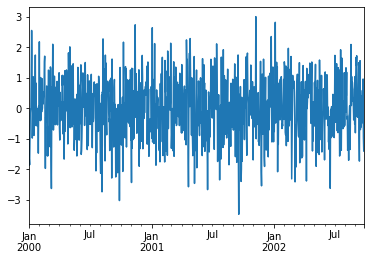

In [92]:
import numpy as np
import pandas as pd

# 生成以1000天为行索引的series，数值用numpy随机生成
series1 = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
print(series1.head(5))

# series自带的plot() 绘图
series1.plot()

## dataframe 保存至外部文件 

In [95]:
print(df)
df.to_csv('foo.csv')  # 将当前df 保存至当前目录下的一个 csv 文件中

   id raw_grade      grade
0   1         a        NaN
1   2         b  very good
2   3         b        NaN
3   4         a        NaN
4   5         a        NaN
5   6         e        NaN


## pd.read_csv  或 pd.read_excel  --读取外部文件

In [103]:
pf10 = pd.read_csv('foo.csv')  # 读取文件，会多出一列行索引
print(pf10)

   Unnamed: 0  id raw_grade      grade
0           0   1         a        NaN
1           1   2         b  very good
2           2   3         b        NaN
3           3   4         a        NaN
4           4   5         a        NaN
5           5   6         e        NaN
